# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Gini is used to describe the purity and impurity of groups when a categorical variable is split. Therefore, it provides a quantitative value for the accuracy of classifying a data point chosen at random. It measures how mixed groups are.
2. Decision tress keep spliting in order to minimize Gini impurity. Therefore, the model will keep splitting to align with noise and outliers in the group which minimizes generalization and leads to overfitting. This can be constrained by imposing a limit on the depth of the tree, imposing a lower bound on the impurity that can appear in the terminal node, and imposing a limit on how few cases can appear at a terminal node.
3. This is false and having too many categorical variables can actually hinder performance of the tree. If there are too many variables, the tree is prone to overfitting and harder to interpret because more branches will form. Therefore, this is not the only scenario in which trees can perform well.
4. Splitting a branch into two is the most simple model and therefore it is easier to reduce impurity in a binary split. If there are only two pathways, there are less optimization calculations that need to occur and the model is easier to interpret.
5. Overfitting occurs when a model is trained too well or is too sensitive to the training data. Therefore, if a decision tree has many branches within it, it is likely the model is overfitting. If there are few splits, then we can assum the model is underfitting. As we have done in the past, we can also compare the training and test sets to determine if over- or underfitting is occuring. A high accuracy of the training set but low correlation to the test set indicates overfitting.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Breast Cancer METABRIC.csv')
print(df.shape, '\n')
df.head()

(2509, 34) 



,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


There are 2,509 observations and 34 variables.

In [3]:
numeric = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_numeric = df[numeric]
df_categorical = df[categorical]

df_categorical = pd.get_dummies(df_categorical)

new_df = pd.concat([df_numeric, df_categorical], axis=1)
new_df.head()

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,True,False,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,True,False,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,False,True,False,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,False,True,False,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,False,True,False,False,False,False,False,True,False,False


In [4]:
X = new_df
y = df['Overall Survival Status']

clean = pd.concat([X, y], axis=1)
clean = clean.dropna()

In [5]:
from sklearn.model_selection import train_test_split

X = clean.drop('Overall Survival Status', axis=1)
y = clean['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

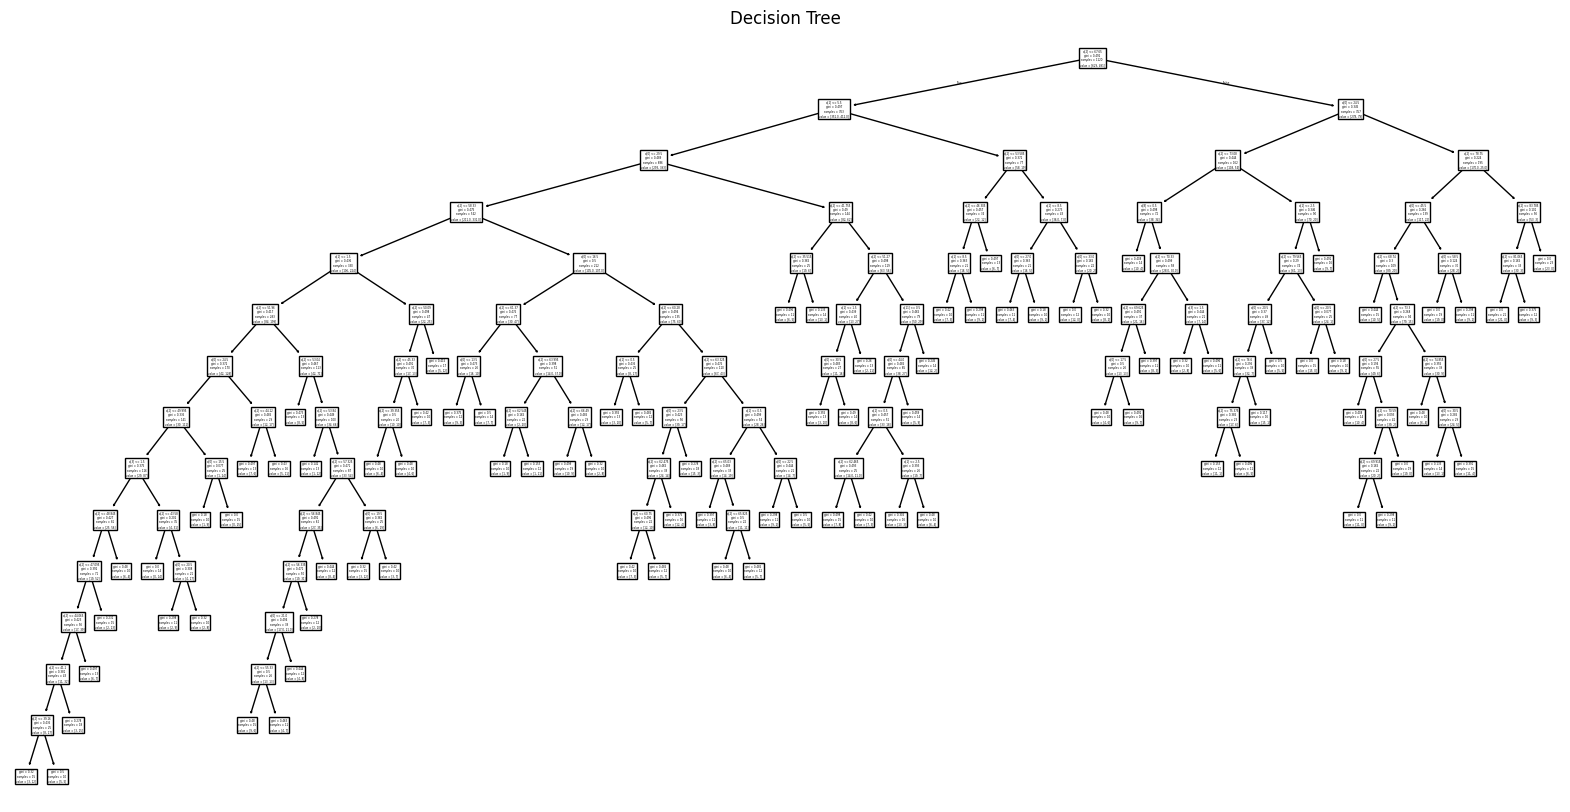

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree)
plt.title('Decision Tree')
plt.show()

In [8]:
y_hat = tree.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.6892857142857143 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,123,38
Living,49,70


**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?